In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'


In [118]:
path = r"C:\Users\tpfl1\OneDrive\Desktop\SERi"

damage = pd.read_csv(f"{path}/피싱_스미싱_파밍_피해_경로_20230202162702.csv", encoding='cp949', index_col=False)
experience = pd.read_csv(f"{path}/피싱_스미싱_파밍_경험_경로_20230202162650.csv", encoding='cp949', index_col=False)

damage.shape, experience.shape

((19, 8), (26, 9))

In [119]:
damage_rename = damage.rename(columns=damage.iloc[0])
damage = damage_rename.drop(index=0)
damage.head(2)

,응답자구분별(1),응답자구분별(2),메일이나 게시판에 연결된 사이트 접속,이벤트를 가장한 홈페이지 접속,전화를 통한 피싱,소셜네트워크(SNS)를 통한 피싱,금융기관 홈페이지를 가장한 웹사이트 접속,문자메시지에 연결된 사이트 접속
1,전체,소계,7.1,1.8,3.1,2.9,1.2,2.6
2,성별,남성,7.6,3.0,3.4,6.0,1.9,1.9


In [120]:
experience_rename = experience.rename(columns=experience.iloc[0])
experience = experience_rename.drop(index=0)
# experience = experience.drop(["응답자구분별(1)", "응답자구분별(2)"], axis=1)
experience.dtypes
experience.head(2)

,응답자구분별(1),응답자구분별(2),메일이나 게시판에 연결된 사이트 접속,이벤트를 가장한 홈페이지 접속,인스턴트 메신저,전화를 통한 피싱,소셜네트워크(SNS)를 통한 피싱,금융기관 홈페이지를 가장한 웹사이트 접속,문자메시지에 연결된 사이트 접속
1,전체,소계,32.5,28.4,16.4,67.0,17.4,22.2,48.6
2,성별,남성,35.6,29.7,16.2,65.8,14.9,24.3,47.3


#### '-' 를 0으로 치환

In [174]:
for x in range(len(experience["응답자구분별(1)"])):
    for y in range(len(experience.columns)):
        if experience.iloc[x][y] == "-":
            experience.iloc[x][y] = "0"

#### 시각화를위해 float로 변환

In [177]:
experience = experience.astype({"메일이나 게시판에 연결된 사이트 접속":"float",
                                "이벤트를 가장한 홈페이지 접속":"float",
                                "인스턴트 메신저":"float",
                                "전화를 통한 피싱":"float",
                                "소셜네트워크(SNS)를 통한 피싱":"float",
                                "금융기관 홈페이지를 가장한 웹사이트 접속":"float",
                                "문자메시지에 연결된 사이트 접속":"float"})

#### 경험경로_total

In [179]:
experience_total = experience.drop(["응답자구분별(1)", "응답자구분별(2)"], axis=1)
experience_total = experience_total.iloc[[0]]
experience_total

,메일이나 게시판에 연결된 사이트 접속,이벤트를 가장한 홈페이지 접속,인스턴트 메신저,전화를 통한 피싱,소셜네트워크(SNS)를 통한 피싱,금융기관 홈페이지를 가장한 웹사이트 접속,문자메시지에 연결된 사이트 접속
1,32.5,28.4,16.4,67.0,17.4,22.2,48.6


In [180]:
# experience_total = experience_total.astype("float")
experience_total.dtypes

메일이나 게시판에 연결된 사이트 접속      float64
이벤트를 가장한 홈페이지 접속          float64
인스턴트 메신저                  float64
전화를 통한 피싱                 float64
소셜네트워크(SNS)를 통한 피싱        float64
금융기관 홈페이지를 가장한 웹사이트 접속    float64
문자메시지에 연결된 사이트 접속         float64
dtype: object

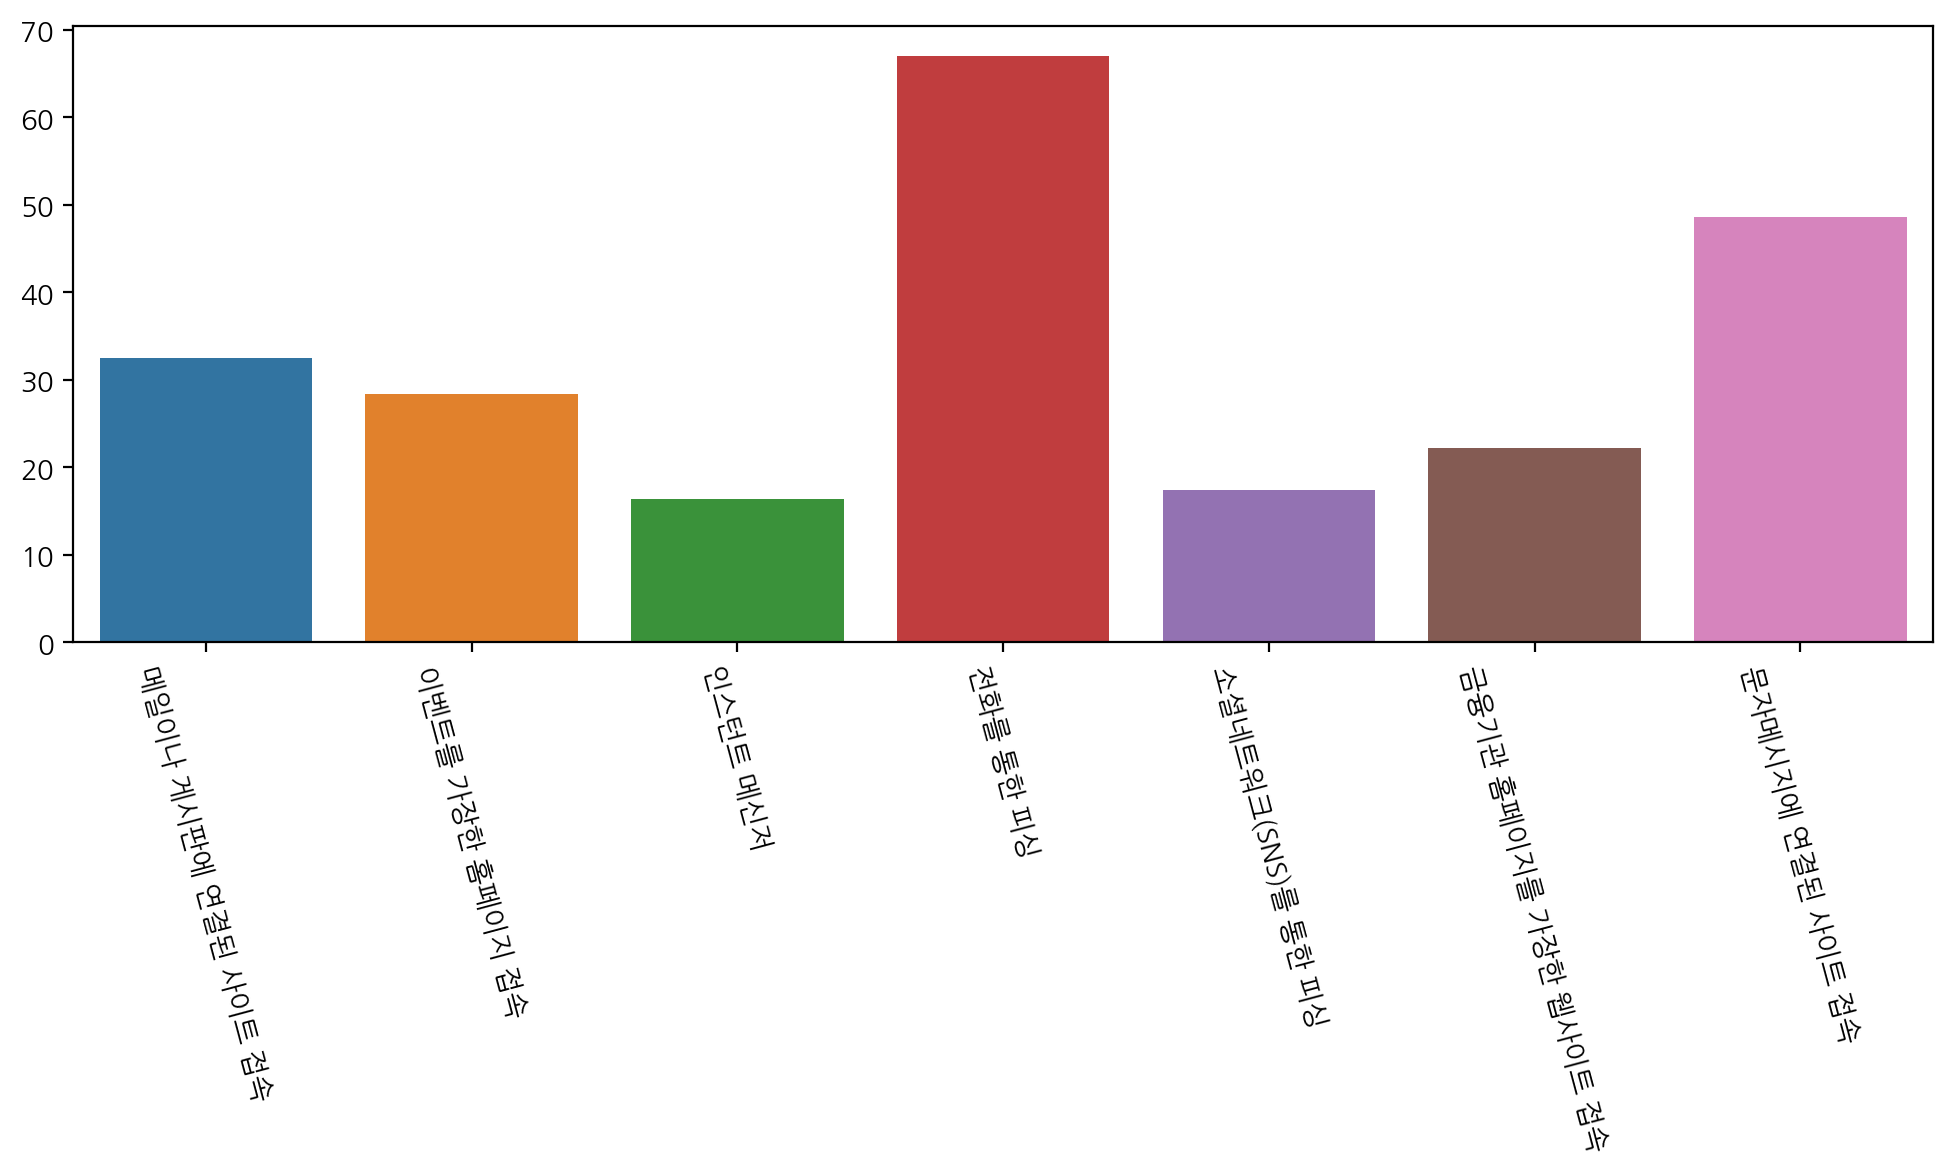

In [181]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=-75)
_= sns.barplot(experience_total)

#### 경험경로_연령대

In [182]:
experience_age = experience.drop(["응답자구분별(1)"], axis=1)
experience_age = experience_age.iloc[3:8]
# experience_age = experience_age.astype({"메일이나 게시판에 연결된 사이트 접속":"float",
#                                         "이벤트를 가장한 홈페이지 접속":"float",
#                                         "인스턴트 메신저":"float",
#                                         "전화를 통한 피싱":"float",
#                                         "소셜네트워크(SNS)를 통한 피싱":"float",
#                                         "금융기관 홈페이지를 가장한 웹사이트 접속":"float",
#                                         "문자메시지에 연결된 사이트 접속":"float"})
experience_age

,응답자구분별(2),메일이나 게시판에 연결된 사이트 접속,이벤트를 가장한 홈페이지 접속,인스턴트 메신저,전화를 통한 피싱,소셜네트워크(SNS)를 통한 피싱,금융기관 홈페이지를 가장한 웹사이트 접속,문자메시지에 연결된 사이트 접속
4,12~19세,22.2,11.1,5.6,61.2,22.3,13.8,58.3
5,20대,22.2,25.0,15.3,68.1,25.0,11.1,40.3
6,30대,40.0,33.3,25.0,70.0,21.7,25.0,51.7
7,40대,30.4,28.7,13.0,67.8,13.1,26.1,49.6
8,50대,41.6,33.3,12.5,60.5,2.1,29.1,43.7


In [183]:
experience_age.dtypes

응답자구분별(2)                  object
메일이나 게시판에 연결된 사이트 접속      float64
이벤트를 가장한 홈페이지 접속          float64
인스턴트 메신저                  float64
전화를 통한 피싱                 float64
소셜네트워크(SNS)를 통한 피싱        float64
금융기관 홈페이지를 가장한 웹사이트 접속    float64
문자메시지에 연결된 사이트 접속         float64
dtype: object

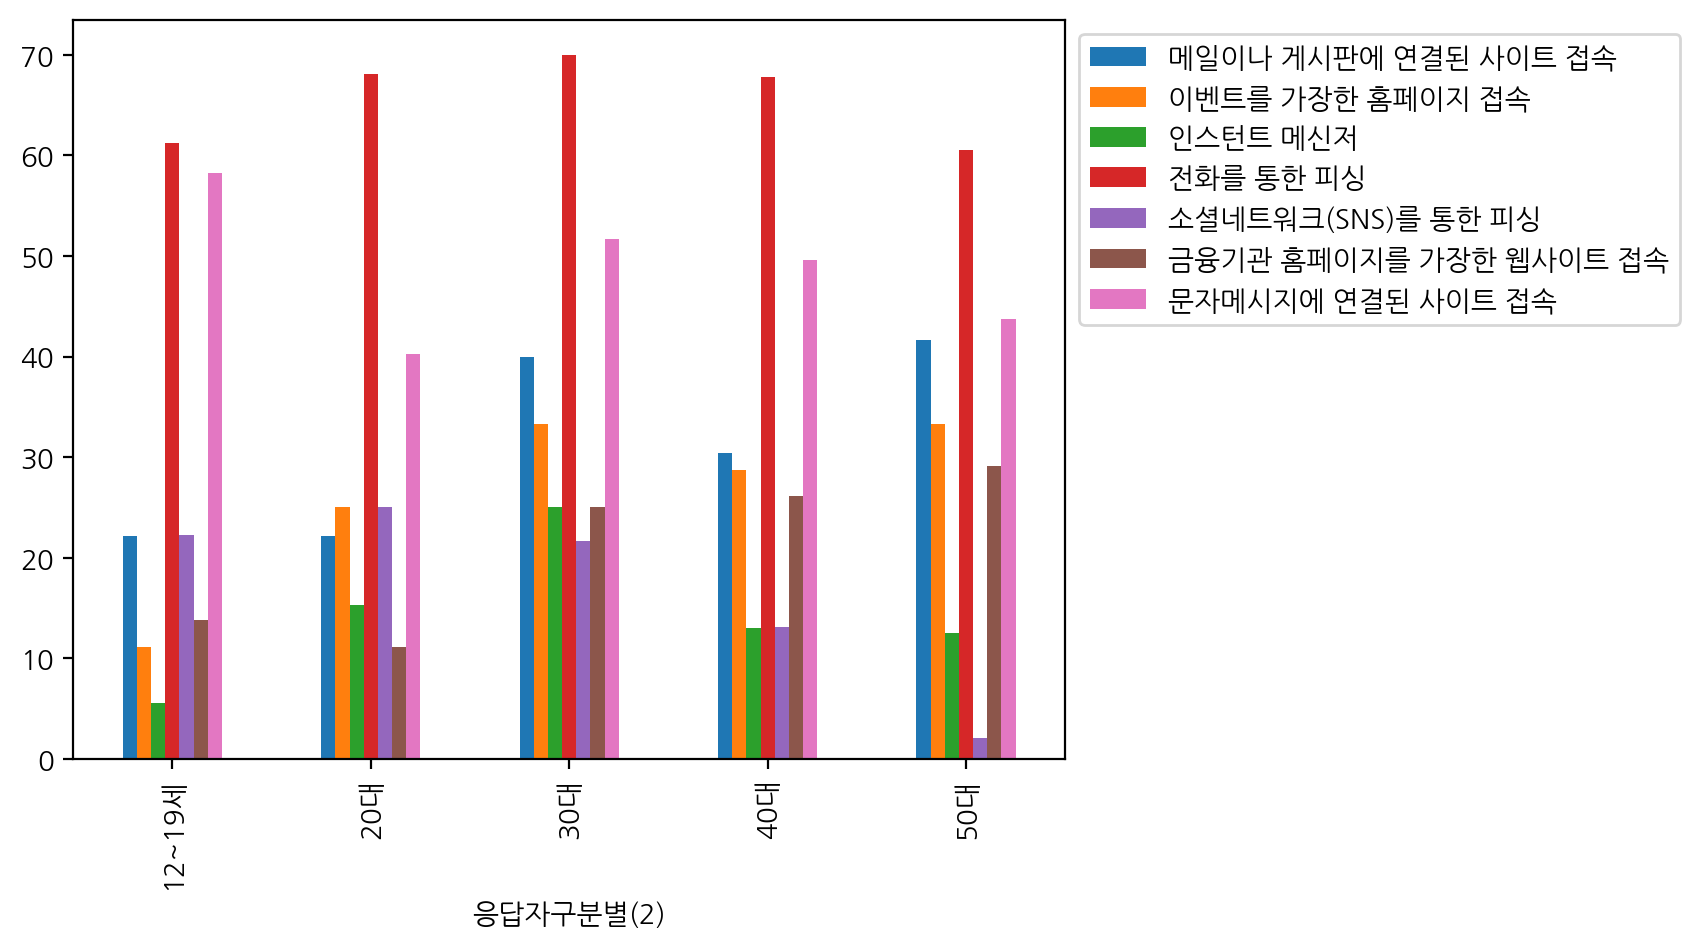

In [184]:
# plt.figure(figsize=(12,4))
# plt.xticks(rotation=-75)

_= experience_age.plot(kind="bar", x="응답자구분별(2)")
plt.legend(bbox_to_anchor=(1.0, 1.0))

#### etc

음 <br>
주로 전화와 메시지를 통한 URL 접속이 피싱원인 <br>
남여비율은 비슷, 20대~40대가 주요타깃층 <br>
생각하던ㄱㅔ 찐이였음... <br>
여기서 예방방법!? <br>